# 📌ACTIVIDAD 4: CLASIFICAR OBRAS DE ARTE.

Crea el notebook saa-u03-p02-a4-<tus_iniciales>.ipynb donde completar la actividad. La
actividad va a consistir en implementar un modelo clasificador al que podamos pasar un
cuadro y este intente indicarnos el autor de la obra de arte y con qué probabilidad es de este
artista.

## DEFINIR DATASET

 Debes acceder a la carpeta 📂 carpeta  y buscar un cuadro de cada uno de estos pintores: Cezánne, Dalí,
Gauguin, Goya, Kandinsky, Miró, Monet, Picasso, Renoir, Rubens, Sorolla, Tiziano, Vangogh y Velázquez. Ya
hay 14 ficheros que puedes usar además de los que tu mismo busques. Debes dejar en la carpeta tus
ficheros con el formato pintor-<tus_iniciales>-fichero.png.
Una vez tengamos suficientes datos, puedes utilizar la misma técnica que usamos en la práctica
anterior para generar un .csv con los datos. Elige tu mismo un tamaño de la imagen (recuerda que
nuestros recursos son locales y a mayor tamaño más características y mayor procesamiento
necesitaremos, intenta que el tamaño tenga la relación de aspecto 4:3).
Nuestro target será el nombre del artista. Será por tanto una clasificación multiclase.

## IMPLEMENTAR CLASIFICADORES
 Prueba al menos a entrenar 2 clasificadores:

 • El primero: SVC ó Árbol ó RandomForest.

 • El segundo: método ensemble: Boost/Bagging.

 Puedes utilizar lo que hicimos en la práctica anterior: defines un diccionario que contenga pipelines
que preprocesen y entrenen a cada clasificador y lo haces en un bucle. O puedes hacerlo uno a uno de
forma manual, como prefieras.

## MEDIR DESEMPEÑO
 Mide el desempeño de todos, muestra informes de entrenamiento y la matriz de confusión. Haz un
gráfico de barras donde aparezcan los puntajes obtenidos por cada uno en train y test.

## MEJORAR ALGUNO AJUSTANDO HIPERPARÁMETROS
 Escoge el que quieras y define el objetivo que quieres conseguir: o mejorar su puntaje o bajar el
overfitting, mediante el ajuste de uno o varios de sus hiperparámetros. Mide y muestra de nuevo el
desempeño en train y en test.

ENTREGA 7:

 a)
 Fotografías subidas a la carpeta compartida:

b)
 Fichero csv con los datos de las fotografías transformado y código que las transforma.

 c)
 División de los datos en train y test dejando el 80% de datos para train e intentando no
desbalancear los datos y con tu propia semilla aleatoria.

 d)
 Realizar entrenamiento de los 4 clasificadores.

 e)
 Mostrar informe de clasificación.

 f) Mostrar matriz de confusión.

 g) Mostrar gráfico comparativo.

 h) Mejora del desempeño de alguno cambiando sus hiperparámetros

In [17]:
import os
import numpy as np
import pandas as pd
from PIL import Image, UnidentifiedImageError

# Ruta a la carpeta de imágenes
carpeta = r"C:\Users\ESP\Desktop\MachineLearning\saa\U3_AprendizajeSupervisado2\U03_Recursos\pintores"

# Tamaño uniforme (4:3) — puedes ajustar si prefieres otro
tamaño = (120, 90)

datos = []
etiquetas = []

for archivo in os.listdir(carpeta):
    ruta = os.path.join(carpeta, archivo)
    try:
        with Image.open(ruta) as img:
            img = img.convert('RGB')         # Fuerza a formato RGB
            img = img.resize(tamaño)         # Redimensionar
            datos.append(np.array(img).flatten())

            nombre_pintor = archivo.split("-")[0]  # Sacar nombre del pintor
            etiquetas.append(nombre_pintor)

    except UnidentifiedImageError:
        print(f"⚠️ Imagen no válida o corrupta: {archivo}")
    except Exception as e:
        print(f"⚠️ Error al procesar {archivo}: {e}")


# Convertir a DataFrame
X = np.array(datos)
y = np.array(etiquetas)

df = pd.DataFrame(X)
df["pintor"] = y

# Guardar CSV (opcional)
csv_salida = os.path.join(carpeta, "pintores_datos.csv")
df.to_csv(csv_salida, index=False)

print(f"✅ Proceso completado: {len(df)} imágenes procesadas.")


✅ Proceso completado: 13 imágenes procesadas.


In [18]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,32391,32392,32393,32394,32395,32396,32397,32398,32399,pintor
0,66,66,66,61,63,64,60,67,70,46,...,153,159,143,123,125,113,43,41,34,Cezanne
1,19,32,41,19,33,44,21,35,46,19,...,12,8,11,11,9,10,10,8,9,Dalí
2,96,66,28,112,85,39,119,97,54,125,...,37,52,27,35,54,34,32,48,26,Gauguin
3,242,242,242,239,239,239,239,239,239,240,...,244,244,244,244,244,244,248,248,248,Goya
4,3,5,18,4,1,10,2,0,8,1,...,44,48,45,46,51,47,51,53,51,Kandinsky


In [19]:
csv_path = r"C:\Users\ESP\Desktop\MachineLearning\saa\U3_AprendizajeSupervisado2\U03_Recursos\pintores_datos.csv"
df.to_csv(csv_path, index=False)

In [20]:
from sklearn.model_selection import train_test_split

X = df.drop("pintor", axis=1)
y = df["pintor"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


--- SVC ---
              precision    recall  f1-score   support

     Cezanne       0.00      0.00      0.00       1.0
     Gauguin       0.00      0.00      0.00       0.0
      Renoir       0.00      0.00      0.00       0.0
     sorolla       0.00      0.00      0.00       1.0
     vangogh       0.00      0.00      0.00       1.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0



C:\Users\ESP\Desktop\MachineLearning\saa\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ESP\Desktop\MachineLearning\saa\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ESP\Desktop\MachineLearning\saa\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} 

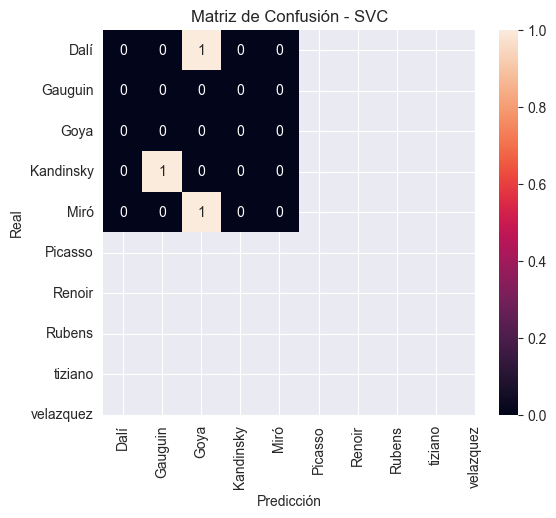

--- RandomForest ---


C:\Users\ESP\Desktop\MachineLearning\saa\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ESP\Desktop\MachineLearning\saa\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ESP\Desktop\MachineLearning\saa\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} 

              precision    recall  f1-score   support

     Cezanne       0.00      0.00      0.00       1.0
     Gauguin       0.00      0.00      0.00       0.0
      Renoir       0.00      0.00      0.00       0.0
     sorolla       0.00      0.00      0.00       1.0
     vangogh       0.00      0.00      0.00       1.0
   velazquez       0.00      0.00      0.00       0.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0



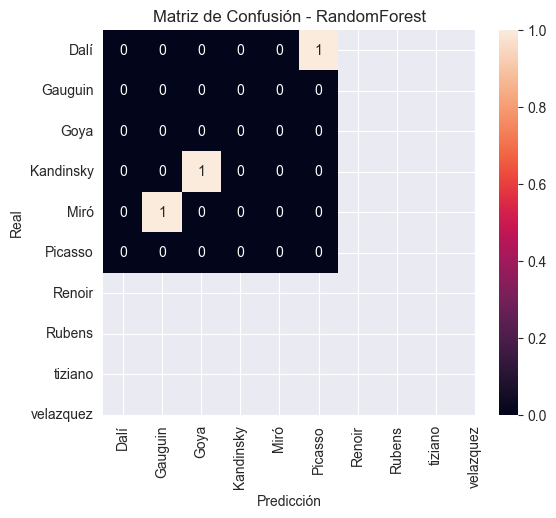

--- Bagging ---
              precision    recall  f1-score   support

     Cezanne       0.00      0.00      0.00       1.0
        Dalí       0.00      0.00      0.00       0.0
     Gauguin       0.00      0.00      0.00       0.0
      Rubens       0.00      0.00      0.00       0.0
     sorolla       0.00      0.00      0.00       1.0
     vangogh       0.00      0.00      0.00       1.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0



C:\Users\ESP\Desktop\MachineLearning\saa\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ESP\Desktop\MachineLearning\saa\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ESP\Desktop\MachineLearning\saa\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} 

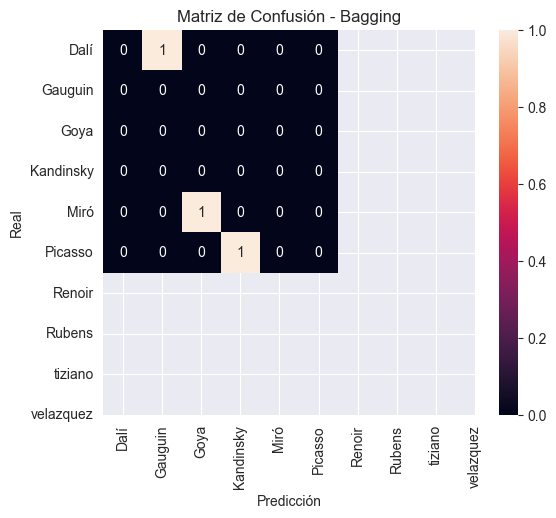

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Diccionario con clasificadores
modelos = {
    "SVC": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", SVC(probability=True, random_state=42))
    ]),
    "RandomForest": Pipeline([
        ("clf", RandomForestClassifier(random_state=42))
    ]),
    "Bagging": Pipeline([
        ("clf", BaggingClassifier(random_state=42))
    ])
}

# Entrenar y evaluar
resultados = {}
for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    train_score = modelo.score(X_train, y_train)
    test_score = modelo.score(X_test, y_test)
    resultados[nombre] = {"train": train_score, "test": test_score}

    print(f"--- {nombre} ---")
    y_pred = modelo.predict(X_test)
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", xticklabels=modelo.classes_, yticklabels=modelo.classes_)
    plt.title(f"Matriz de Confusión - {nombre}")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.show()


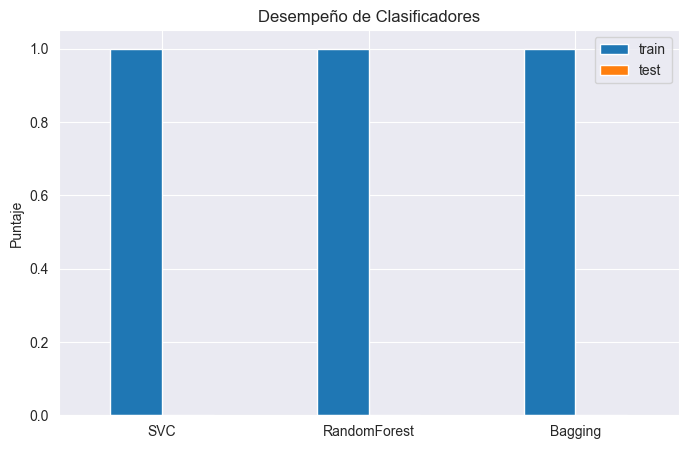

In [22]:
scores_df = pd.DataFrame(resultados).T
scores_df.plot(kind='bar', figsize=(8,5))
plt.title("Desempeño de Clasificadores")
plt.ylabel("Puntaje")
plt.xticks(rotation=0)
plt.grid(True)
plt.show()


In [23]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "clf__C": [0.1, 1, 10],
    "clf__gamma": ['scale', 'auto']
}

grid = GridSearchCV(
    Pipeline([
        ("scaler", StandardScaler()),
        ("clf", SVC(probability=True, random_state=42))
    ]),
    param_grid,
    cv=3,
    n_jobs=-1
)

grid.fit(X_train, y_train)
print("Mejor configuración:", grid.best_params_)
print("Puntaje en test:", grid.score(X_test, y_test))


ValueError: n_splits=3 cannot be greater than the number of members in each class.